In [1]:
import pandas as pd
import requests
import re
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.formula.api as smf 

In [2]:
data_df = pd.read_csv('final_df_processed_2.csv')
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
0,379,3176029031,180001,2007.0,93535,"45657 RODIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0
1,380,3176013048,60000,1957.0,93535,"45555 RODIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0
2,381,3170041047,150000,1996.0,93535,"43449 HURON ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0
3,382,3150071022,155001,2006.0,93535,"3134 PEACEFUL WY, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0
4,383,3140030015,201000,1983.0,93535,"852 E AVENUE J12, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0


In [3]:
len(data_df)

741108

In [4]:
len(data_df.loc[data_df["Year"] >= 2017])

265671

In [5]:
zip_df = data_df.loc[data_df['zip_code'] == 93535]
zip_df

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
0,379,3176029031,180001,2007.0,93535,"45657 RODIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,4.322363e+08,4.322363e+08,4.322363e+08,63300.0,63400.0,62900.0
1,380,3176013048,60000,1957.0,93535,"45555 RODIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,4.322363e+08,4.322363e+08,4.322363e+08,63300.0,63400.0,62900.0
2,381,3170041047,150000,1996.0,93535,"43449 HURON ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,4.322363e+08,4.322363e+08,4.322363e+08,63300.0,63400.0,62900.0
3,382,3150071022,155001,2006.0,93535,"3134 PEACEFUL WY, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,4.322363e+08,4.322363e+08,4.322363e+08,63300.0,63400.0,62900.0
4,383,3140030015,201000,1983.0,93535,"852 E AVENUE J12, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,14.5,120721.175325,125930.913043,115609.427273,4.322363e+08,4.322363e+08,4.322363e+08,63300.0,63400.0,62900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,12693,3150045012,420004,1989.0,93535,"2625 VIA ROMANA, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.1,396951.437500,394732.929412,379704.360825,1.264551e+09,1.264551e+09,1.264551e+09,64900.0,64800.0,64600.0
12315,12694,3070006008,325003,1987.0,93535,"41028 168TH ST E, LAKE LOS ANGELES, CA 93535, USA",93534,2.22,93536,5.13,...,12.1,396951.437500,394732.929412,379704.360825,1.264551e+09,1.264551e+09,1.264551e+09,64900.0,64800.0,64600.0
12316,12695,3170040083,435004,2004.0,93535,"1034 E AVENUE K11, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.1,396951.437500,394732.929412,379704.360825,1.264551e+09,1.264551e+09,1.264551e+09,64900.0,64800.0,64600.0
12317,12696,3176031036,566005,2019.0,93535,"1748 E HOLGUIN ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,12.1,396951.437500,394732.929412,379704.360825,1.264551e+09,1.264551e+09,1.264551e+09,64900.0,64800.0,64600.0


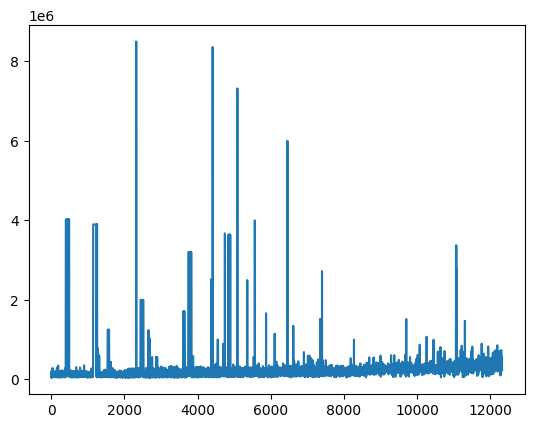

In [6]:
plt.plot(zip_df.index, zip_df['sale_price'])

In [7]:
zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


mod1 = smf.ols(f'change_sale_price ~ sale_price_Prev', data = zip_df).fit() 
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:      change_sale_price   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     887.0
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          2.81e-188
Time:                        21:33:30   Log-Likelihood:            -1.7329e+05
No. Observations:               12318   AIC:                         3.466e+05
Df Residuals:                   12316   BIC:                         3.466e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.318e+04   3159.581     

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_14996/2461574441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['sale_price_Prev'] = zip_df['sale_price'].shift(1)
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_14996/2461574441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_df['change_sale_price'] = zip_df['sale_price'] - zip_df['sale_price_Prev']


In [8]:
# Extract the t-statistic for sale_price_Prev
t_stat_sale_price_Prev = mod1.tvalues['sale_price_Prev']
print("T-stat for sale_price_Prev:", t_stat_sale_price_Prev)

T-stat for sale_price_Prev: -29.78283313647416


In [9]:
data_df.columns

Index(['Unnamed: 0', 'property_id', 'sale_price', 'building_year_built',
       'zip_code', 'Address_Google', 'closest_zip_1', 'distance_1',
       'closest_zip_2', 'distance_2', 'closest_zip_3', 'distance_3', 'Month',
       'Year', 'Returns', 'California AGI', 'City_Name', 'Unemployment Rate',
       'Labor Force', 'Date', 'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'Zip_month',
       'zip_1_Unemployment Rate_0', 'zip_1_Unemployment Rate_1',
       'zip_1_Unemployment Rate_2', 'zip_1_Unemployment Rate_3',
       'zip_1_sale_price_0', 'zip_1_sale_price_1', 'zip_1_sale_price_2',
       'zip_1_sale_price_3', 'zip_1_California AGI_0',
       'zip_1_California AGI_1', 'zip_1_California AGI_2',
       'zip_1_California AGI_3', 'zip_1_Labor Force_0', 'zip_1_Labor Force_1',
       'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_0', 'zip_2_Unemployment Rate_1',
       'zip_2_Unemployment Rate_2', 'zip_2_Unemployment Ra

In [10]:
data_df['Quarter'] = data_df['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
data_df.dropna(inplace=True)
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3,Quarter
0,379,3176029031,180001,2007.0,93535,"45657 RODIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0,2
1,380,3176013048,60000,1957.0,93535,"45555 RODIN AVE, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0,2
2,381,3170041047,150000,1996.0,93535,"43449 HURON ST, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0,2
3,382,3150071022,155001,2006.0,93535,"3134 PEACEFUL WY, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0,2
4,383,3140030015,201000,1983.0,93535,"852 E AVENUE J12, LANCASTER, CA 93535, USA",93534,2.22,93536,5.13,...,120721.175325,125930.913043,115609.427273,432236315.0,432236315.0,432236315.0,63300.0,63400.0,62900.0,2


In [11]:
data_df.sort_values(by='Date', inplace=True)

In [12]:
data_df.drop(columns=['Unnamed: 0', 'property_id', 'Address_Google', 'Month',
       'Year','Date'], inplace=True)

In [13]:
data_df.drop(columns=['Zip_month'], inplace=True)

In [14]:
data_df.columns

Index(['sale_price', 'building_year_built', 'zip_code', 'closest_zip_1',
       'distance_1', 'closest_zip_2', 'distance_2', 'closest_zip_3',
       'distance_3', 'Returns', 'California AGI', 'City_Name',
       'Unemployment Rate', 'Labor Force',
       'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'zip_1_Unemployment Rate_0',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_0', 'zip_1_sale_price_1',
       'zip_1_sale_price_2', 'zip_1_sale_price_3', 'zip_1_California AGI_0',
       'zip_1_California AGI_1', 'zip_1_California AGI_2',
       'zip_1_California AGI_3', 'zip_1_Labor Force_0', 'zip_1_Labor Force_1',
       'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_0', 'zip_2_Unemployment Rate_1',
       'zip_2_Unemployment Rate_2', 'zip_2_Unemployment Rate_3',
       'zip_2_sale_price_0', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_

In [15]:
data_df = pd.get_dummies(data_df, columns=['zip_code'], drop_first=True, dtype=int)



In [16]:
data_df.drop(columns=['closest_zip_1', 'closest_zip_2', 'closest_zip_3'], inplace=True)

In [ ]:

train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train).drop(columns=['sale_price'])

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test).drop(columns=['sale_price'])

y_test = data_df.tail(test)['sale_price']




# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=500, random_state=78) 


# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

train_predictions = rf_model.predict(X_train)

In [27]:
from sklearn.metrics import mean_absolute_error

# Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
mae = mean_absolute_error(data_df['sale_price'].tail(test), predictions)

print(f'Mean Absolute Error (MAE): {mae}')

# Calculate residuals (actual - predicted)
residuals = data_df['sale_price'].tail(test) - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

Mean Absolute Error (MAE): 310300.2354174466
RMSE: 645877.6764624645


In [31]:
range(500)

range(0, 500)

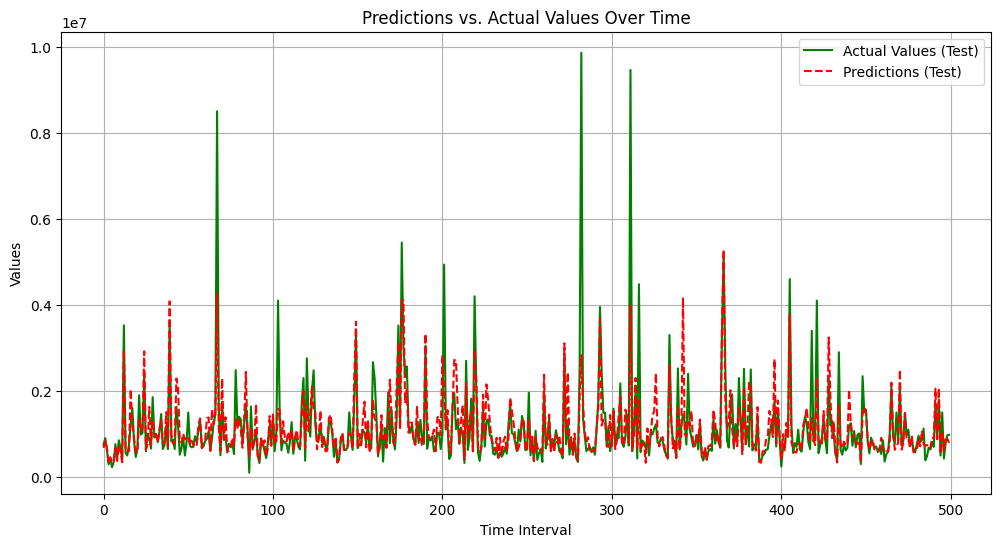

In [32]:
train_time = range(len(y_train[-500:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(500), y_test[-500:], label='Actual Values (Test)', color='green')
plt.plot(range(500), predictions[-500:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

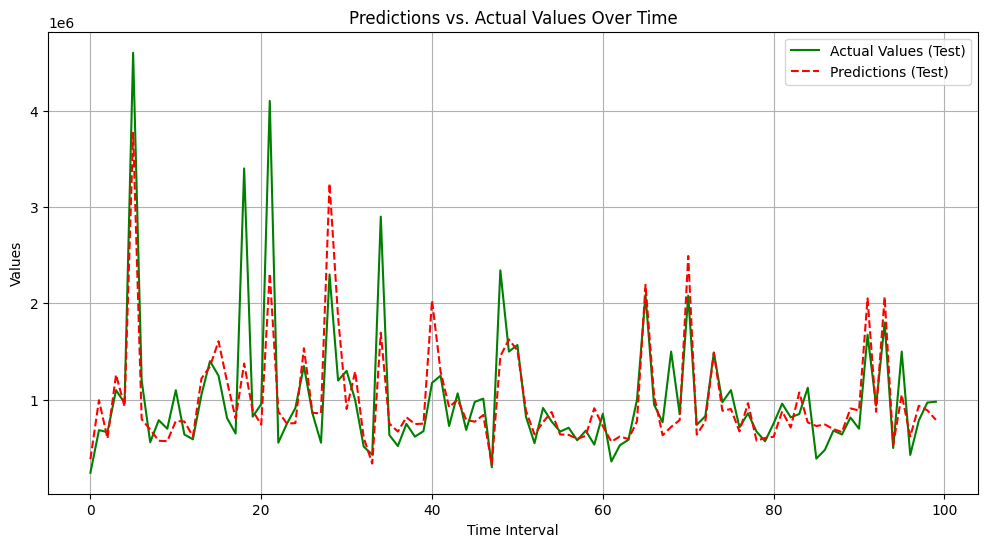

In [39]:
train_time = range(len(y_train[-100:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[-100:], label='Actual Values (Test)', color='green')
plt.plot(range(100), predictions[-100:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

In [33]:
X_test.columns

Index(['building_year_built', 'zip_code', 'closest_zip_1', 'distance_1',
       'closest_zip_2', 'distance_2', 'closest_zip_3', 'distance_3', 'Returns',
       'California AGI', 'Unemployment Rate', 'Labor Force',
       'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'zip_1_Unemployment Rate_0',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_0', 'zip_1_sale_price_1',
       'zip_1_sale_price_2', 'zip_1_sale_price_3', 'zip_1_California AGI_0',
       'zip_1_California AGI_1', 'zip_1_California AGI_2',
       'zip_1_California AGI_3', 'zip_1_Labor Force_0', 'zip_1_Labor Force_1',
       'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_0', 'zip_2_Unemployment Rate_1',
       'zip_2_Unemployment Rate_2', 'zip_2_Unemployment Rate_3',
       'zip_2_sale_price_0', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_2_sale_price_3', 'zip_2_California

In [37]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': rf_model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                 Feature  Importance
65                          sale_price_1    0.280395
0                    building_year_built    0.197457
67                          sale_price_3    0.107936
66                          sale_price_2    0.054427
25                zip_1_California AGI_3    0.023020
..                                   ...         ...
68                      California AGI_1    0.002545
40                zip_2_California AGI_2    0.002487
39                zip_2_California AGI_1    0.002366
74                               Quarter    0.002084
12  property_type_SINGLE FAMILY DWELLING    0.001045

[75 rows x 2 columns]


In [38]:
print(feature_importance_df[:20])

                                  Feature  Importance
65                           sale_price_1    0.280395
0                     building_year_built    0.197457
67                           sale_price_3    0.107936
66                           sale_price_2    0.054427
25                 zip_1_California AGI_3    0.023020
13  property_type_SINGLE FAMILY RESIDENCE    0.016168
53                     zip_3_sale_price_3    0.016115
37                     zip_2_sale_price_3    0.012237
34                     zip_2_sale_price_0    0.010398
19                     zip_1_sale_price_1    0.009575
18                     zip_1_sale_price_0    0.009527
51                     zip_3_sale_price_1    0.008564
20                     zip_1_sale_price_2    0.008546
22                 zip_1_California AGI_0    0.008464
21                     zip_1_sale_price_3    0.008458
35                     zip_2_sale_price_1    0.008434
50                     zip_3_sale_price_0    0.008221
36                     zip_2